# Predicting survival using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone survived in titanic.

We're going to take the following approach:
1. Problem definition 
2. Data 
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation

## 1. Problem Definition 

In a statement, 
> Given  parameters about passengers on titanic, can we predict whether or not they survived? 

## 2. Data 

The data came from  Kaggle https://www.kaggle.com/c/titanic/data

## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether or not a passenger survived during the 
proof of concept, we'll pursue the project 


## 4. Features 
1. survival-( 0=No, 1=yes)
2. pclass - Ticket class 
  * 1= 1st 
  * 2= 2nd
  * 3= 3rd 
3. sex-(male, female)
4. Age- age in years 
5. sibsp- number of siblings / spouses aboard the Titanic
6. parch- number of parents / children aboard the Titanic
7. ticket- Ticket number
8. fare- Passenger fare
9. cabin- Cabin number
10. embarked- Port of Embarkation
   * C = Cherbourg
   * Q = Queenstown
   * S = Southampton
   
 

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation 

In [1]:
# Import all the tools we need 

#  Regular EDA (exploratory data analysis) and plotting libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook 
%matplotlib inline


In [2]:
# Models from scikit-Learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score , f1_score


## Load Data 

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape # (rows,columns)

(891, 12)

## Data Exploration (exploratory data analysis or EDA)


In [6]:
# let's check the null values
train.isnull().mean() 

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

(<AxesSubplot:>,)

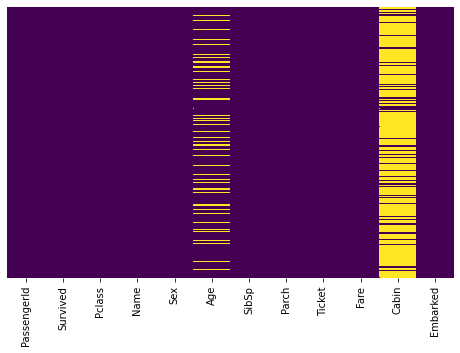

In [7]:
plt.figure(figsize=(8,5)),
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis'),

In [8]:
train['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

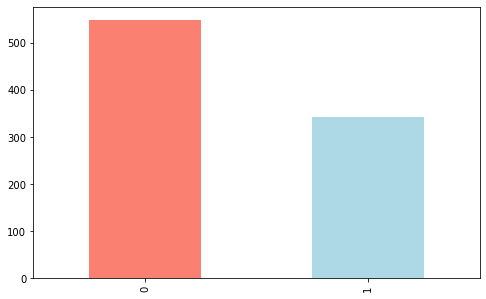

In [9]:
plt.figure(figsize=(8,5))

train['Survived'].value_counts().plot(kind='bar', color = ['salmon','lightblue']); 

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.Sex.value_counts() # survival frequency according to sex 

male      577
female    314
Name: Sex, dtype: int64

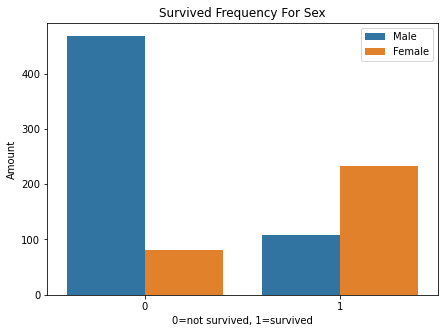

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(x='Survived',data=train,hue='Sex')
plt.xlabel('0=not survived, 1=survived')
plt.ylabel('Amount')
plt.legend(["Male","Female"]);
plt.title('Survived Frequency For Sex');

In [14]:
sns.set_style('whitegrid')

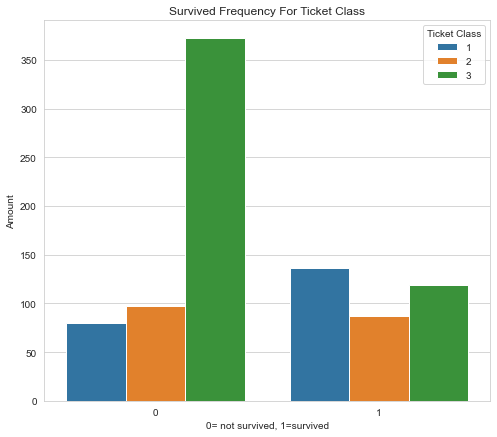

In [15]:
plt.figure(figsize=(8,7))
sns.countplot(x='Survived',data=train,hue='Pclass');
plt.xlabel('0= not survived, 1=survived');
plt.ylabel('Amount')
plt.title('Survived Frequency For Ticket Class');
plt.legend(title='Ticket Class');

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


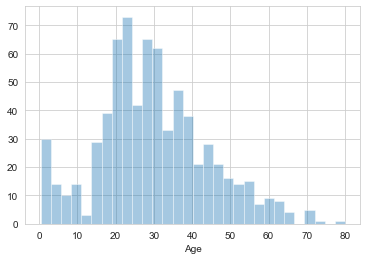

In [16]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30);

In [17]:
train['Age'].min() , train['Age'].max()

(0.42, 80.0)

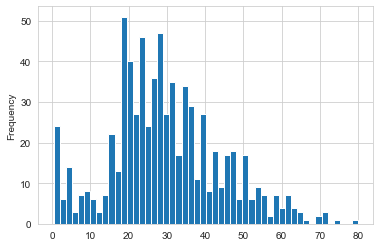

In [18]:
train['Age'].plot(kind='hist',bins=50);

In [19]:
#g = sns.FacetGrid(data=train,col='Sex')
#g.map(plt.hist,'Age')

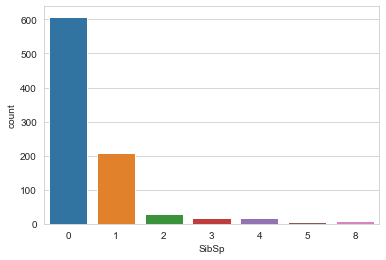

In [20]:
sns.countplot(x='SibSp',data=train);

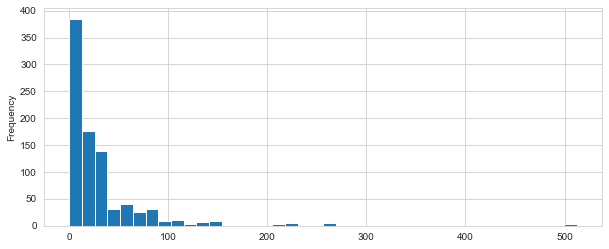

In [21]:

train['Fare'].plot(kind='hist',figsize=(10,4),bins=40);

In [22]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

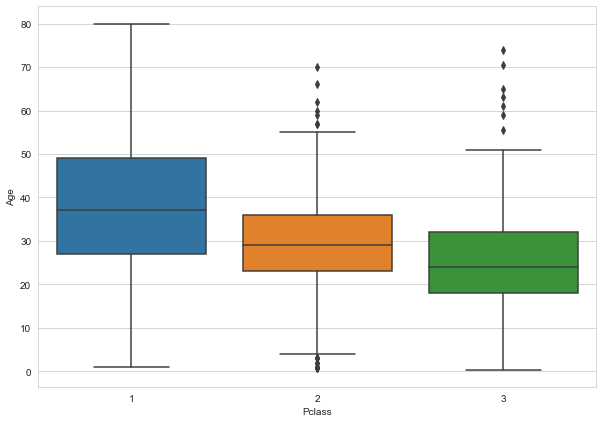

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train);

In [26]:
round(train[train['Pclass']==1]['Age'].mean())

38

In [27]:
round(train[train['Pclass']==2]['Age'].mean())

30

In [28]:
round(train[train['Pclass']==3]['Age'].mean())

25

In [29]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[0]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass ==2:
            return 30
        else:
            return 25
    else:
        return Age

In [30]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

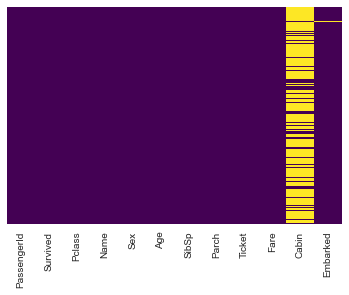

In [31]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [32]:
train.drop('Cabin',axis=1,inplace=True) # removing the cabin column as there are a lot of missing data 

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


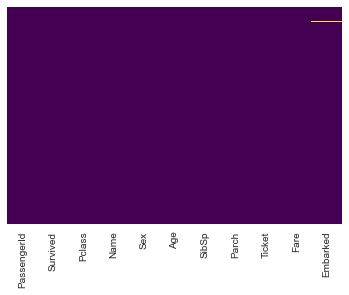

In [34]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [35]:
train[train.isnull().any(axis=1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [36]:
train.dropna(inplace=True)

In [37]:
train.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train,sex,embark],axis=1)

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [40]:
train.drop(['PassengerId','Embarked','Sex','Name','Ticket'],axis=1,inplace=True)

In [41]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## 5. Modelling 

In [42]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [43]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [44]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [45]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [46]:
# split data into train and test sets 
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [47]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
708,1,22.0,0,0,151.5500,0,0,1
240,3,25.0,1,0,14.4542,0,0,0
382,3,32.0,0,0,7.9250,1,0,1
792,3,25.0,8,2,69.5500,0,0,1
683,3,14.0,5,2,46.9000,1,0,1
...,...,...,...,...,...,...,...,...
107,3,25.0,0,0,7.7750,1,0,1
271,3,25.0,0,0,0.0000,1,0,1
862,1,48.0,0,0,25.9292,0,0,1
436,3,21.0,2,2,34.3750,0,0,1


In [48]:
y_train 

708    1
240    0
382    0
792    0
683    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 711, dtype: int64

Now we've got our data splits into training and test sets, it's time to build machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set. 

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifiers 
3. Random Forest Classifier

In [49]:
# Put models in a dictionary  
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# create a function to fit and score models 
def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different scikit-Learn machine learning models 
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train :  training labels 
    y_test : test labels 
    """
    # set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores 
    model_scores = {}
    # Loop through models 
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train,y_train)
        # Evaluate the model and apppend its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [50]:
model_scores = fit_and_score(models=models, X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7865168539325843,
 'KNN': 0.702247191011236,
 'Random Forest': 0.7696629213483146}

## Model Comparison

<AxesSubplot:>

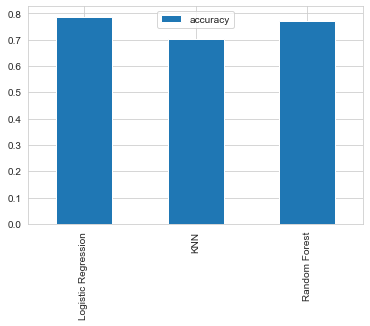

In [51]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

Now we've got a baseline model...and we know a model's first predictions aren't always what we should based our next steps off

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune: 
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV 

In [52]:
# Create a hyperparameter grid for LogisticRegression 
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier 
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, 
let's tune them using RandomizedSearchCV...

In [53]:
# Tune LogisticRegression 

np.random.seed(42)

# Setup random hyperparametr search for logisticRegression 
rs_log_reg = RandomizedSearchCV (estimator = LogisticRegression(),
                                 param_distributions=log_reg_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [54]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [55]:
rs_log_reg.score(X_test,y_test)

0.797752808988764

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [56]:
# Setup random seed 
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier 
rs_rf = RandomizedSearchCV(estimator = RandomForestClassifier(),param_distributions = rf_grid,
                           n_iter=30,
                           cv=5,
                          verbose=True)


# Fit random hyperparameters search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [57]:
#check the best hyperparameters 
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [58]:
# Evaluate the grid search RandomForestClassifier model 
rs_rf.score(X_test,y_test)

0.8033707865168539

## Hyperparameter Tuning with GridSearchCV

since our RandomForestClassifier model provides the best scores so far, 
we'll try and improve hem agian using GridSearchCV...

In [59]:
# Different hyperparameters for our RandomForestClassifier model 
rf_grid = {"n_estimators":[910],
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2,10,2),
           "min_samples_leaf": np.arange(1, 10, 2)}


# Setup grid hyperparameter search for RandomForestClassifier 
rs_rf2 = GridSearchCV(RandomForestClassifier(),param_grid=rf_grid,cv=5,verbose=True)


# Fit grid hyperparameter search model 
rs_rf2.fit(X_train,y_train); 


Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [60]:
#check the best hyperparameters 
rs_rf2.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 910}

In [61]:
# Evaluate the grid search RandomForestClassifier model 
rs_rf2.score(X_test,y_test) 

0.7752808988764045

## Evaluating our tuned machine learning classifier, beyond accuracy 

* Confusion matrix 
* Classification report 
* Precision 
* Recall 
* F1-score



In [62]:
# Make predictions with tuned model 
y_preds = rs_rf.predict(X_test)

In [63]:
y_preds

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [64]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64

In [65]:
# confusion matrix 
print(confusion_matrix(y_test,y_preds)) 

[[94 15]
 [20 49]]


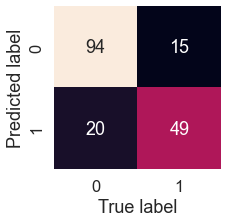

In [67]:
plt.figure(figsize=(3,3))

sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
plt.xlabel("True label");
plt.ylabel("Predicted label");

In [85]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.77      0.71      0.74        69

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



### Calculate evaluation metrics using cross-validation 

We're going to calculate accuracy, precision, recall and f1-score of our model 
using cross-validation and to do so we'll be using `cross_val_score()`.

In [68]:
# Check best hyperparameters 
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [69]:
# Create a new classifier with best parameters 
clf = RandomForestClassifier(n_estimators=910,min_samples_split=18,min_samples_leaf=1,max_depth=10)

In [70]:
# Cross-validated accuracy 

cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.79775281, 0.81460674, 0.84269663, 0.78651685, 0.84180791])

In [71]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8166761886624769

In [72]:
# Cross-validated precision  

cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision

array([0.75409836, 0.79310345, 0.85964912, 0.82978723, 0.83333333])

In [73]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8139942998229006

In [74]:
# Cross-validated recall  

cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall

array([0.66176471, 0.67647059, 0.72058824, 0.57352941, 0.73529412])

In [75]:
cv_recall = np.mean(cv_recall)
cv_recall

0.6735294117647059

In [76]:
# Cross-validated f1-score  
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1

array([0.71875   , 0.72440945, 0.77777778, 0.67241379, 0.79365079])

In [77]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.7374003626701834

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

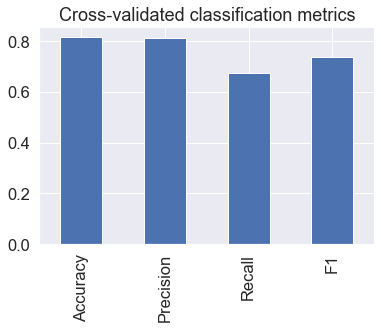

In [78]:
# Visualize cross-validated metrics 
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0]
                            ) 



cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)

### Feature Importance 


In [79]:
clf = RandomForestClassifier(n_estimators=910,min_samples_split=18,min_samples_leaf=1,max_depth=10)

In [80]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=18, n_estimators=910)

In [81]:
clf.feature_importances_

array([0.12724676, 0.13801005, 0.05228326, 0.04098307, 0.20581789,
       0.39626222, 0.01131292, 0.02808383])

In [82]:
cdf = pd.DataFrame(clf.feature_importances_,X.columns,columns=['Coeffecient'])

In [83]:
cdf

,Coeffecient
Pclass,0.127247
Age,0.138010
SibSp,0.052283
Parch,0.040983
Fare,0.205818
male,0.396262
Q,0.011313
S,0.028084


<BarContainer object of 8 artists>

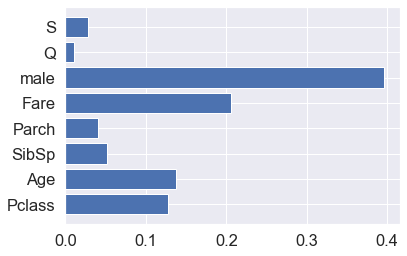

In [84]:
plt.barh(X.columns, clf.feature_importances_)
